<a href="https://colab.research.google.com/github/salsabillaflsft/MachineLearningProject/blob/main/recommender_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library

In [6]:
import numpy as np # mathematical functions
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


### Import Data

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')
%cd /content/drive/My Drive/Course/Project-ML

/content/drive/My Drive/Course/Project-ML


### Data Cleansing

In [8]:
data = pd.read_csv("coins.csv")
data.head()

,id,name,slug,symbol,status,category,description,subreddit,notice,tags,...,message_board,chat,explorer,reddit,technical_doc,source_code,announcement,platform_id,date_added,date_launched
0,1,Bitcoin,bitcoin,BTC,active,coin,## **What Is Bitcoin (BTC)?**\n\nBitcoin is a ...,bitcoin,NaN,"mineable, pow, sha-256, store-of-value, state-...",...,https://bitcointalk.org,NaN,https://blockchain.coinmarketcap.com/chain/bit...,https://reddit.com/r/bitcoin,https://bitcoin.org/bitcoin.pdf,https://github.com/bitcoin/,NaN,NaN,2013-04-28T00:00:00.000Z,NaN
1,2,Litecoin,litecoin,LTC,active,coin,## What Is Litecoin (LTC)?\n\nLitecoin (LTC) i...,litecoin,NaN,"mineable, pow, scrypt, medium-of-exchange, bin...",...,"https://litecointalk.io/, https://litecoin-fou...",https://telegram.me/litecoin,"https://blockchair.com/litecoin, https://chain...",https://reddit.com/r/litecoin,NaN,https://github.com/litecoin-project/litecoin,https://bitcointalk.org/index.php?topic=47417.0,NaN,2013-04-28T00:00:00.000Z,NaN
2,3,Namecoin,namecoin,NMC,active,coin,Namecoin (NMC) is a cryptocurrency . Users are...,namecoin,NaN,"mineable, pow, sha-256, platform",...,NaN,https://telegram.me/namecoin,"https://nmc.tokenview.com/, https://www.namebr...",https://reddit.com/r/namecoin,NaN,https://github.com/namecoin,https://bitcointalk.org/?topic=6017.0,NaN,2013-04-28T00:00:00.000Z,NaN
3,4,Terracoin,terracoin,TRC,active,coin,Terracoin (TRC) launched in 2012 with the aim ...,terracoin,NaN,"mineable, pow, sha-256, masternodes",...,https://medium.com/@clockuniverse,"https://mattermost.terracoin.io/, https://t.me...","https://insight.terracoin.io/, https://explore...",https://reddit.com/r/terracoin,https://wiki.terracoin.io/view/Whitepaper,https://github.com/terracoin,https://bitcointalk.org/index.php?topic=1364146.0,NaN,2013-04-28T00:00:00.000Z,NaN
4,5,Peercoin,peercoin,PPC,active,coin,Peercoin (PPC) is a cryptocurrency . Users are...,peercoin,NaN,"mineable, hybrid-pow-pos, sha-256, medium-of-e...",...,https://talk.peercoin.net,"https://t.me/peercoin, https://discord.gg/m294ReV","https://chainz.cryptoid.info/ppc/, https://exp...",https://reddit.com/r/peercoin,https://docs.peercoin.net/,https://github.com/peercoin,https://bitcointalk.org/index.php?topic=101820.0,NaN,2013-04-28T00:00:00.000Z,NaN


In [9]:
data.shape #check data shape

(8927, 23)

In [10]:
#drop unused colums
data = data.drop(columns=['id','description','subreddit','notice','twitter','message_board','chat','explorer','reddit','technical_doc','source_code','announcement','platform_id','date_added','date_launched'])

In [11]:
data.head()

,name,slug,symbol,status,category,tags,tag_names,website
0,Bitcoin,bitcoin,BTC,active,coin,"mineable, pow, sha-256, store-of-value, state-...","Mineable, PoW, SHA-256, Store of Value, State ...",https://bitcoin.org/
1,Litecoin,litecoin,LTC,active,coin,"mineable, pow, scrypt, medium-of-exchange, bin...","Mineable, PoW, Scrypt, Medium of Exchange, Bin...",https://litecoin.org/
2,Namecoin,namecoin,NMC,active,coin,"mineable, pow, sha-256, platform","Mineable, PoW, SHA-256, Platform",https://www.namecoin.org/
3,Terracoin,terracoin,TRC,active,coin,"mineable, pow, sha-256, masternodes","Mineable, PoW, SHA-256, Masternodes",http://www.terracoin.io/
4,Peercoin,peercoin,PPC,active,coin,"mineable, hybrid-pow-pos, sha-256, medium-of-e...","Mineable, Hybrid - PoW & PoS, SHA-256, Medium ...",http://www.peercoin.net


In [12]:
#check data shape
data.shape

(8927, 8)

In [13]:
#check each data type of columns and missing values
data.info() 
data.isnull().sum() 
#/ data.shape[0] * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8927 entries, 0 to 8926
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       8927 non-null   object
 1   slug       8927 non-null   object
 2   symbol     8927 non-null   object
 3   status     8927 non-null   object
 4   category   8869 non-null   object
 5   tags       3754 non-null   object
 6   tag_names  3747 non-null   object
 7   website    8506 non-null   object
dtypes: object(8)
memory usage: 558.1+ KB


name            0
slug            0
symbol          0
status          0
category       58
tags         5173
tag_names    5180
website       421
dtype: int64

### Data Preparation

In [14]:
#drop data with missing values
data.dropna(inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3610 entries, 0 to 8893
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       3610 non-null   object
 1   slug       3610 non-null   object
 2   symbol     3610 non-null   object
 3   status     3610 non-null   object
 4   category   3610 non-null   object
 5   tags       3610 non-null   object
 6   tag_names  3610 non-null   object
 7   website    3610 non-null   object
dtypes: object(8)
memory usage: 253.8+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


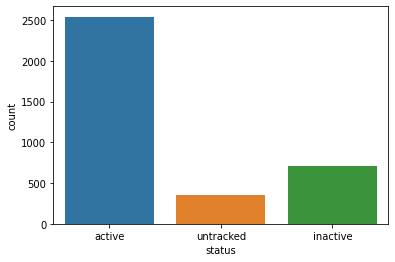

In [16]:
sns.countplot(data['status'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


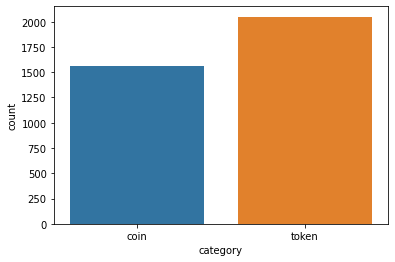

In [17]:
sns.countplot(data['category'])
plt.show()

In [18]:
#drop data with untracked & inactive status
index = data[(data['status'] == 'untracked') | (data['status'] == 'inactive')].index
data.drop(index, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


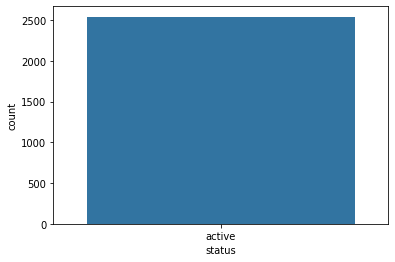

In [19]:
sns.countplot(data['status'])
plt.show()

In [20]:
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540 entries, 0 to 2539
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       2540 non-null   object
 1   slug       2540 non-null   object
 2   symbol     2540 non-null   object
 3   status     2540 non-null   object
 4   category   2540 non-null   object
 5   tags       2540 non-null   object
 6   tag_names  2540 non-null   object
 7   website    2540 non-null   object
dtypes: object(8)
memory usage: 158.9+ KB


In [21]:
data

,name,slug,symbol,status,category,tags,tag_names,website
0,Bitcoin,bitcoin,BTC,active,coin,"mineable, pow, sha-256, store-of-value, state-...","Mineable, PoW, SHA-256, Store of Value, State ...",https://bitcoin.org/
1,Litecoin,litecoin,LTC,active,coin,"mineable, pow, scrypt, medium-of-exchange, bin...","Mineable, PoW, Scrypt, Medium of Exchange, Bin...",https://litecoin.org/
2,Namecoin,namecoin,NMC,active,coin,"mineable, pow, sha-256, platform","Mineable, PoW, SHA-256, Platform",https://www.namecoin.org/
3,Terracoin,terracoin,TRC,active,coin,"mineable, pow, sha-256, masternodes","Mineable, PoW, SHA-256, Masternodes",http://www.terracoin.io/
4,Peercoin,peercoin,PPC,active,coin,"mineable, hybrid-pow-pos, sha-256, medium-of-e...","Mineable, Hybrid - PoW & PoS, SHA-256, Medium ...",http://www.peercoin.net
...,...,...,...,...,...,...,...,...
2535,Crusaders of Crypto,crusaders-of-crypto,CRUSADER,active,token,play-to-earn,Play to Earn,"https://www.crusadersofcrypto.com, https://cru..."
2536,Mr Bigglesworth,mr-bigglesworth,BIGGLES,active,token,memes,Memes,https://mrbigglesworth.co/
2537,Splinterlands,splinterlands,SPS,active,token,"collectibles-nfts, gaming, binance-smart-chain...","Collectibles & NFTs, Gaming, Binance Smart Cha...",https://splinterlands.com
2538,Pyram Token,pyram-token,PYRAM,active,token,"collectibles-nfts, gaming, binance-smart-chain...","Collectibles & NFTs, Gaming, Binance Smart Cha...",https://www.arenaswap.com/


In [22]:
#tags wordcloud
tags_count = (data['tags'].str.split(',').explode().value_counts().sort_values(ascending=False))

(-0.5, 999.5, 399.5, -0.5)

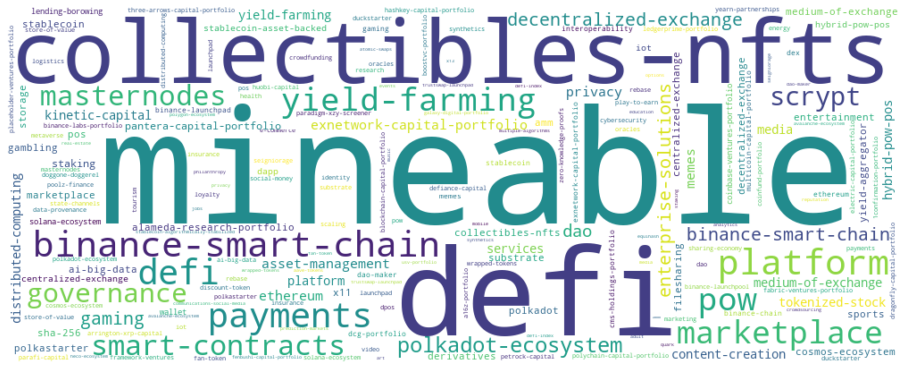

In [23]:
from wordcloud import WordCloud
tags_wc = WordCloud(width=1000,height=400,background_color='white')
tags_wc.generate_from_frequencies(tags_count.to_dict())
plt.figure(figsize=(16, 8))
plt.imshow(tags_wc, interpolation="bilinear")
plt.axis('off')

### Model

TF-IDF

In [24]:
#create matrix of TF-IDF features
vectorizer_tags = TfidfVectorizer(use_idf=True, token_pattern=r'(?u)\b\w[\w-]*\w\b')

tags_matrix = vectorizer_tags.fit_transform(data['tags'])
print(vectorizer_tags.get_feature_names_out())

['1confirmation-portfolio' 'a16z-portfolio' 'aave-tokens' 'adult'
 'agriculture' 'ai-big-data' 'alameda-research-portfolio' 'amm'
 'analytics' 'argon2' 'arrington-xrp-capital' 'art' 'asset-backed-coin'
 'asset-management' 'atomic-swaps' 'avalanche-ecosystem' 'binance-chain'
 'binance-labs-portfolio' 'binance-launchpad' 'binance-launchpool'
 'binance-smart-chain' 'blake' 'blake256' 'blake2b' 'blake2s'
 'blockchain-capital-portfolio' 'boostvc-portfolio' 'bounce-launchpad'
 'bulletproofs' 'centralized-exchange' 'cms-holdings-portfolio'
 'coinbase-ventures-portfolio' 'coinfund-portfolio' 'collectibles-nfts'
 'commodities' 'communications-social-media' 'content-creation' 'cosmos'
 'cosmos-ecosystem' 'cross-chain-aggregator-dex' 'crowdfunding'
 'crowdsourcing' 'cryptonight' 'cryptonight-lite' 'cuckoo-cycle'
 'cybersecurity' 'dag' 'dagger-hashimoto' 'dao' 'dao-maker' 'dapp'
 'data-availability-proof' 'data-provenance' 'dcg-portfolio'
 'decentralized-exchange' 'defi' 'defi-index' 'defiance-cap

In [25]:
tags_matrix

<2540x236 sparse matrix of type '<class 'numpy.float64'>'
	with 6272 stored elements in Compressed Sparse Row format>

In [26]:
#idf weights
df_idf = pd.DataFrame(vectorizer_tags.idf_, index=vectorizer_tags.get_feature_names_out(),columns=["IDF-Value"]) 
 
#sort 
df_idf.sort_values(by=['IDF-Value'])

,IDF-Value
mineable,2.715630
defi,2.924111
collectibles-nfts,3.419778
binance-smart-chain,3.455818
platform,3.577623
...,...
cuckoo-cycle,8.147166
cryptonight-lite,8.147166
cross-chain-aggregator-dex,8.147166
bulletproofs,8.147166


Cosine Similarity

In [27]:
tags_cosine = cosine_similarity(tags_matrix, tags_matrix)

name_index = pd.Series(data.index, index=data['name'])

Recommender

In [28]:
def recommender(c_name, crypto_name, df, cosine=tags_cosine):
  crypto = crypto_name[c_name]

  cosine_score = list(enumerate(cosine[crypto]))
  cosine_score = sorted(cosine_score, key=lambda x:x[1], reverse=True)

  #top 10 recomms
  cosine_score = cosine_score[1:11]
  crypto_index = [i[0] for i in cosine_score]

  #result
  c_list = []
  for i in df[crypto_index]:
    c_list.append(i)

  df = pd.DataFrame(c_list, columns=['Recommended crypto assets'])
  df.set_index('Recommended crypto assets', inplace=True)

  return df

In [29]:
recommender('Bitcoin',name_index, data['name'])

""
Recommended crypto assets
Ethereum
Nervos Network
Maker
Compound
Stacks
Keep Network
Filecoin
Polkadot
Uniswap


### Data

In [31]:
#gather symbols data to hashtag & cashtag
data.head()

,name,slug,symbol,status,category,tags,tag_names,website
0,Bitcoin,bitcoin,BTC,active,coin,"mineable, pow, sha-256, store-of-value, state-...","Mineable, PoW, SHA-256, Store of Value, State ...",https://bitcoin.org/
1,Litecoin,litecoin,LTC,active,coin,"mineable, pow, scrypt, medium-of-exchange, bin...","Mineable, PoW, Scrypt, Medium of Exchange, Bin...",https://litecoin.org/
2,Namecoin,namecoin,NMC,active,coin,"mineable, pow, sha-256, platform","Mineable, PoW, SHA-256, Platform",https://www.namecoin.org/
3,Terracoin,terracoin,TRC,active,coin,"mineable, pow, sha-256, masternodes","Mineable, PoW, SHA-256, Masternodes",http://www.terracoin.io/
4,Peercoin,peercoin,PPC,active,coin,"mineable, hybrid-pow-pos, sha-256, medium-of-e...","Mineable, Hybrid - PoW & PoS, SHA-256, Medium ...",http://www.peercoin.net


In [71]:
data['symbol'].count()

2540

In [72]:
new_df = data[['symbol']].copy()

In [73]:
new_df

,symbol
0,BTC
1,LTC
2,NMC
3,TRC
4,PPC
...,...
2535,CRUSADER
2536,BIGGLES
2537,SPS
2538,PYRAM


In [74]:
new_df['cashtag']= '$' + new_df['symbol']
new_df['hashtag']= '#' + new_df['symbol']

In [75]:
new_df

,symbol,cashtag,hashtag
0,BTC,$BTC,#BTC
1,LTC,$LTC,#LTC
2,NMC,$NMC,#NMC
3,TRC,$TRC,#TRC
4,PPC,$PPC,#PPC
...,...,...,...
2535,CRUSADER,$CRUSADER,#CRUSADER
2536,BIGGLES,$BIGGLES,#BIGGLES
2537,SPS,$SPS,#SPS
2538,PYRAM,$PYRAM,#PYRAM


In [77]:
new_df.to_csv('cryptotwittertags.csv')